In [6]:
%pylab inline
import pandas as pd
import requests
import os
from os.path import join
import base64
from IPython.display import Image


subs = pd.DataFrame() #pd.read_csv("../subjects.txt", header=None)
#print("Number of subjects", len(subs))

Populating the interactive namespace from numpy and matplotlib


In [7]:
def dict2arr(image_data, mask_data):
    mask_arr = np.zeros((image_data.shape[0], image_data.shape[1]))
    for ikey, vald in mask_data.items():
        for jkey, val in vald.items():
            mask_arr[int(jkey), int(ikey)] = val
    return mask_arr

In [8]:
def write_image(fname, img_data):
    imgdata = base64.b64decode(img_data)
    with open(fname, 'wb') as f:
        f.write(imgdata)
    return fname

from PIL import Image as Im

def save_arr(fname, A):
    im = Im.fromarray(A.astype(np.uint8))
    im.save(fname)
    return fname

In [10]:
url_image = "https://api.medulina.com/api/v1/image/{}"
url_mask = "https://api.medulina.com/api/v1/mask/{}"
subs["n_tiles"] = None
basedir = os.path.abspath("./ds_cheng/tiles")

def get_query_string(subject,task):
    qs = '?where={"subject":"%s", "task": "%s"}' % (subject, task)
    return url_image.format(qs)

def get_aggmask_query_string(image_id):
    url = 'https://api.medulina.com/api/v1/maskagg/?aggregate={"$image_search":"' + image_id + '"}'
    return url

def get_mask_query_string(image_id):
    qs = '?where={"image_id": "%s", "mode": "truth"}' % image_id
    return url_mask.format(qs)

def get_all_tries():
    qs = '?where={"subject":"%s", "task": "%s"}' % (subject, task)

In [11]:
def get_subject_list():
    return [
    "49.48.48.51.54.48",
    "49.48.48.53.55.50",
    "49.48.48.54.51.57",
    "49.48.48.57.50.48",
    "49.48.49.48.49.54",
    "49.48.49.48.56.50",
    "49.48.49.49.50.55",
    "49.48.49.55.57.55",
    "49.48.49.56.48.49",
    "49.48.50.52.50.48",
    "49.48.50.52.52.54",
    "49.48.50.54.55.53",
    "49.48.50.55.49.52",
    "49.48.50.56.49.56",
    "49.48.50.57.50.57",
    "49.48.50.57.51.53",
    "49.48.50.57.54.48",
    "49.48.50.57.56.53",
    "49.48.51.54.55.51",
    "49.48.51.57.50.53",
    "49.48.52.49.54.55",
    "49.48.52.50.56.49",
    "49.48.52.54.57.53",
    "49.48.53.51.55.52",
    "49.48.53.53.53.53",
    "49.48.53.57.51.55",
    "49.48.54.50.56.52",
    "49.48.54.52.52.50",
    "49.48.54.53.51.52",
    "49.48.54.53.57.50",
    "49.48.54.54.54.53",
    "49.48.54.55.50.48",
    "49.48.54.57.49.52",
    "49.48.55.49.57.48",
    "49.48.55.50.52.56",
    "49.48.55.52.57.52",
    "49.48.55.57.52.54",
    "49.48.56.53.49.52",
    "49.48.56.53.53.48",
    "49.48.56.53.57.48",
    "49.48.56.57.52.53",
    "49.48.57.51.53.48",
    "49.48.57.52.49.49",
    "49.48.57.57.54.56",
    "49.49.48.49.49.54",
    "49.49.48.56.48.56",
    "49.49.49.48.55.55",
    "49.49.49.51.54.54",
    "49.49.49.53.51.50",
    "49.49.49.54.57.54",
    "49.49.49.55.49.48",
    "49.49.50.48.48.50",
    "49.49.50.48.54.50",
    "49.49.50.50.53.50",
    "49.49.50.53.53.50",
    "49.49.50.54.52.56",
    "49.49.50.54.53.48",
    "49.49.51.48.57.56",
    "49.49.51.52.51.53",
    "49.49.51.53.53.52",
    "49.49.51.54.49.52",
    "49.49.51.56.48.53",
    "49.49.51.57.55.49",
    "49.49.52.48.49.56",
    "49.49.52.51.53.57",
    "49.49.52.52.49.55",
    "53.51.54.54.57",
    "56.56.53.49.48",
    "57.53.57.54.57",
    "57.55.51.55.52",
    "57.55.54.48.55",
    "57.55.55.51.55",
    "57.55.55.57.51",
    "57.55.56.55.53",
    "57.55.57.52.51",
    "57.56.50.52.49",
    "57.57.48.49.55",
    "57.57.48.56.57",
    "57.57.49.54.50",
    "57.57.50.56.56",
    "57.57.51.48.56",
    "57.57.56.49.53"
]


In [9]:
task = "cheng_et_al_001"
subject_list = get_subject_list(task)
for i, s in enumerate(subject_list):
    r = requests.get(get_query_string(s, task))
    tile_data = r.json()
    subs.loc[i, "n_tiles"] = len(tile_data["_items"])
    outdir = join(basedir, s)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
        
    for item in tile_data["_items"]:
        fname = join(outdir, "base%03d.jpg" % (int(item["slice"])))
        write_image(fname, item["pic"])
        
        image_data = imread(fname)
        
        image_id = item["_id"]
        aggurl = get_aggmask_query_string(image_id)
        m = requests.get(aggurl)
        agg_dict = m.json()["mask_sum"]
        agg_arr = dict2arr(image_data, agg_dict)
        agg_fname = fname.replace("base", "agg").replace("jpg", "png")
        save_arr(agg_fname, agg_arr)
        
        
        t = requests.get(get_mask_query_string(image_id))
        truth_dict = t.json()["_items"][0]["pic"]
        truth_arr = dict2arr(image_data, truth_dict)
        truth_fname = fname.replace("base", "truth").replace("jpg", "png")
        save_arr(truth_fname, truth_arr)
                
    print("completed", s)
        
    

completed sub000
completed sub001
completed sub002
completed sub003
completed sub005
completed sub006
completed sub007
completed sub008
completed sub010
completed sub011
completed sub013
completed sub014
completed sub015
completed sub017
completed sub020
completed sub021
completed sub022
completed sub023
completed sub025
completed sub026
completed sub029
completed sub030
completed sub031


In [16]:
base = imread("./tiles/sub030/base018.jpg")
agg = imread("./tiles/sub030/agg018.png").astype(np.float)
truth = imread("./tiles/sub030/truth018.png")


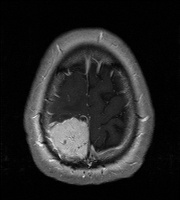

In [79]:
Image("/Users/akeshavan/Dropbox/software/pymed/pymed/projects/meningioma/tiles/sub000/base04.jpg")

In [10]:
ls logs/events.out.tfevents.1506534941.shuksan

events.out.tfevents.1506532372.shuksan  events.out.tfevents.1506535343.shuksan
events.out.tfevents.1506534941.shuksan  events.out.tfevents.1506535871.shuksan
